# Model Training

---

In this notebook, I will train a Reinforcement Learning Agent to collect yellow bananas and avoid blue bananas.

### Import necessary packages

In [1]:
from unityagents import UnityEnvironment
from agent import Agent
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Start the Bananas environment

In [2]:
env = UnityEnvironment(file_name="./Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### Train the DQN Agent

Now I train the agent to solve the environment using basic DQN.

In [5]:
# initialize agent
agent = Agent(state_size=state_size, 
              action_size=action_size)

# train and get scores
scores, avg_scores = agent.train(env)

Episode 100	Average Score: 1.31
Episode 200	Average Score: 5.56
Episode 300	Average Score: 8.77
Episode 400	Average Score: 10.42
Episode 499	Average Score: 13.00
Environment solved in 399 episodes!	Average Score: 13.00


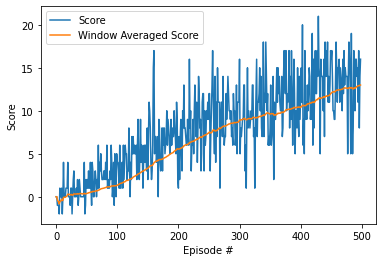

In [6]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='Score')
plt.plot(np.arange(len(avg_scores)), avg_scores, label='Window Averaged Score')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

### Double DQN

Implementing the Double DQN architecture from this [paper](https://papers.nips.cc/paper/3964-double-q-learning)

In [7]:
# initialize agent
double_agent = Agent(state_size=state_size,
                     action_size=action_size,
                     double_dqn=True)

# train and get scores
double_scores, double_avg_scores = double_agent.train(env)

Episode 100	Average Score: 0.29
Episode 200	Average Score: 3.42
Episode 300	Average Score: 6.69
Episode 400	Average Score: 9.77
Episode 500	Average Score: 12.84
Episode 544	Average Score: 13.07
Environment solved in 444 episodes!	Average Score: 13.07


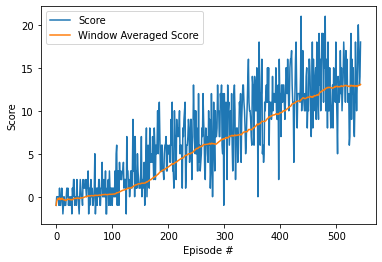

In [8]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(double_scores)), double_scores, label='Score')
plt.plot(np.arange(len(double_avg_scores)), double_avg_scores, label='Window Averaged Score')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

### Dueling DQN

Implementing the Dueling DQN architecture from this [paper](https://arxiv.org/pdf/1511.06581.pdf)

In [9]:
# initialize agent
dueling_agent = Agent(state_size=state_size,
                      action_size=action_size,
                      dueling=True)

# train and get scores
dueling_scores, dueling_avg_scores = dueling_agent.train(env)

Episode 100	Average Score: 0.87
Episode 200	Average Score: 4.06
Episode 300	Average Score: 7.58
Episode 400	Average Score: 9.70
Episode 496	Average Score: 13.02
Environment solved in 396 episodes!	Average Score: 13.02


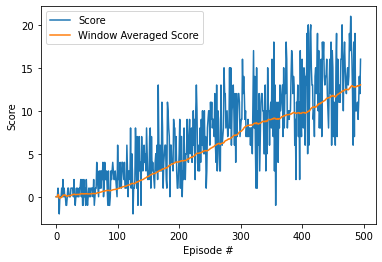

In [10]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(dueling_scores)), dueling_scores, label='Score')
plt.plot(np.arange(len(dueling_avg_scores)), dueling_avg_scores, label='Window Averaged Score')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

### Prioritized Experience Replay

Implementing Prioritized Experience Replay from this [paper](https://arxiv.org/search?searchtype=author&query=Schaul%2C+T)

In [5]:
# initialize agent
per_agent = Agent(state_size=state_size,
                  action_size=action_size,
                  per=True)

# train and get scores
per_scores, per_avg_scores = per_agent.train(env)

Episode 100	Average Score: 0.96
Episode 200	Average Score: 4.40
Episode 300	Average Score: 7.99
Episode 400	Average Score: 10.84
Episode 500	Average Score: 12.12
Episode 561	Average Score: 13.02
Environment solved in 461 episodes!	Average Score: 13.02


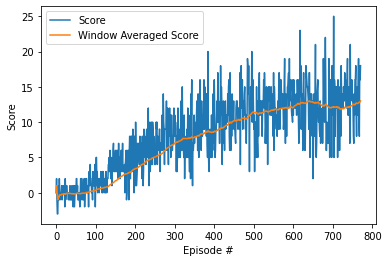

In [6]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(per_scores)), per_scores, label='Score')
plt.plot(np.arange(len(per_avg_scores)), per_avg_scores, label='Window Averaged Score')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

### Double + Dueling DQN

In [13]:
# initialize agent
double_dueling_agent = Agent(state_size=state_size,
                             action_size=action_size,
                             double_dqn=True,
                             dueling=True)

# train and get scores
double_dueling_scores, double_dueling_avg_scores = double_dueling_agent.train(env)

Episode 100	Average Score: 0.79
Episode 200	Average Score: 4.46
Episode 300	Average Score: 7.57
Episode 400	Average Score: 9.95
Episode 500	Average Score: 12.16
Episode 522	Average Score: 13.00
Environment solved in 422 episodes!	Average Score: 13.00


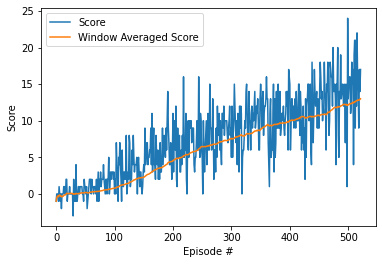

In [14]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(double_dueling_scores)), double_dueling_scores, label='Score')
plt.plot(np.arange(len(double_dueling_avg_scores)), double_dueling_avg_scores, label='Window Averaged Score')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

### Dueling + PER DQN

In [15]:
# initialize agent
dueling_per_agent = Agent(state_size=state_size,
                          action_size=action_size,
                          dueling=True,
                          per=True)

# train and get scores
dueling_per_scores, dueling_per_avg_scores = dueling_per_agent.train(env)

Episode 100	Average Score: 0.57
Episode 200	Average Score: 2.18
Episode 300	Average Score: 5.88
Episode 400	Average Score: 9.90
Episode 500	Average Score: 12.07
Episode 531	Average Score: 13.02
Environment solved in 431 episodes!	Average Score: 13.02


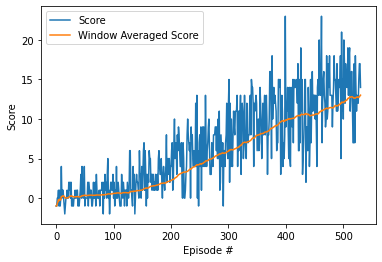

In [16]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(dueling_per_scores)), dueling_per_scores, label='Score')
plt.plot(np.arange(len(dueling_per_avg_scores)), dueling_per_avg_scores, label='Window Averaged Score')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

### Double + Dueling + PER DQN

In [17]:
# initialize agent
double_dueling_per_agent = Agent(state_size=state_size,
                             action_size=action_size,
                             double_dqn=True,
                             dueling=True,
                             per=True)

# train and get scores
ddp_scores, ddp_avg_scores = double_dueling_per_agent.train(env)

Episode 100	Average Score: 0.73
Episode 200	Average Score: 4.27
Episode 300	Average Score: 8.01
Episode 400	Average Score: 10.75
Episode 500	Average Score: 11.66
Episode 576	Average Score: 13.08
Environment solved in 476 episodes!	Average Score: 13.08


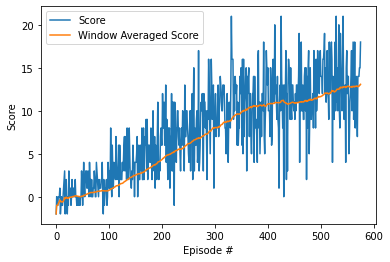

In [18]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(ddp_scores)), ddp_scores, label='Score')
plt.plot(np.arange(len(ddp_avg_scores)), ddp_avg_scores, label='Window Averaged Score')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()